# Long Talk(Feb. 23th, 2023) 

> Illustration of rvesimulator repo, and the presetation is consisted of following main aspects:
- Structure of the rvesimuator repo 
- Functionality of each folder 
- How to use this repo to generate desired data 
- Further development of this repo 



## 1. rvesimulator structure  
```
rvesimulator                                                                        
│   README.md
│
└───rvesimulator(python 3)
│   │
│   └─── design_of_experiment
│   │    │   __init__.py
│   │    │   samplers.py
│   │    │   path_sampler.py
│   │   
│    ─── microstructures
│   │    │   __init__.py
│   │    │   heter_radius_circles.py
│   │    │   heter_radius_sphere.py 
│   │
│    ─── simulator 
│   │    │   __init__.py   
│   │    │   abaqus_simulator.py (interface between abaqus and python)
│   │    │   hollow_plate_rve.py (generate sim_info.json)
│   │    │   coopative_learning_case.py(generate sim_info.json)
│   │    │   ......
│  
└───examples

└───scriptbase(python 2)
│   │   __init__.py
│   │    base.py
│   │    geometry.py  
│   │    material.py
│   │    pbc.py  
│   │    loading.py
│   │    jobs.py
│   │    postprocess.py
│   │    hollow_plate_rve.py(input sim_info.json)
│   │    coopative_learning_case.py(input sim_info.json)
│   │    ......
└───
```

## 2. Functionality of each folder 
Each folder has different features, for instance: 
- design of experiments takes case of draw samples from the design space or generate the desired strain path which will be useful if we want to simulate some history dependent simulations. 
- microstructure uses a typlical Monte Carlo algorithm to generate rve mirco-structures and also it leaves a functionality to convert the micro-structure information to the format of CRATE 
- simulators has several well defined cases to generate simulation data 

### 2.1 microstructure 
Micro-structure generation is one of the most important issues in multi-scale simulation. Usually, we can generate a series of different micro-strcutures to reflect the actual distribution of two materials those fullfill an RVE. 
1. Components of RVE
- Fiber material
- Matrix material 
2. Schematic of RVE 
<center><img src="RVE.png" width="300"></center>

<center>Figure 1. schemaric of RVE </center>

#### 2.1.1 Selected algorithm for Micro-structure generation 

- Generating the micro-structures is a non-trival problem because there are many requirements such as the partiles should not overlap between each other, different shapes of partcles should provide, the particles also shoulf obey the periodical boundary conditions, and so on. 
- With regular shapes, such as disk, ellipse in 2D scenario, sphere in 3D scenario; we can obtain the analytical formula to describe their shapes. Therefore, it provides much more information to design an algorithm to generate the micro-structures. Moreover, most of those algorithms are based on techniques like Monte Carlo Simulation, Melocular dynamics and so forth, so there are no same micro-structures from two different realizations.
- What's more, if the shapes are arbitrary then the generation of micro-structure becomes very difficult as an NP hard problem. 

--selected methods in this version of rve-simulator

[1](https://www.sciencedirect.com/science/article/pii/S0266353808001048?casa_token=s9ISzrlWlGYAAAAA:m0PtidsMewaSuJOFLYEKC9NhggEZa0U01-rxW67DHR1ehCwBMg3gqGnzX3XTMxNF_DwGCxI_) Melro, A. R., Camanho, P. P., & Pinho, S. T. (2008). Generation of random distribution of fibres in long-fibre reinforced composites. Composites Science and Technology, 68(9), 2092-2102.

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.02 s


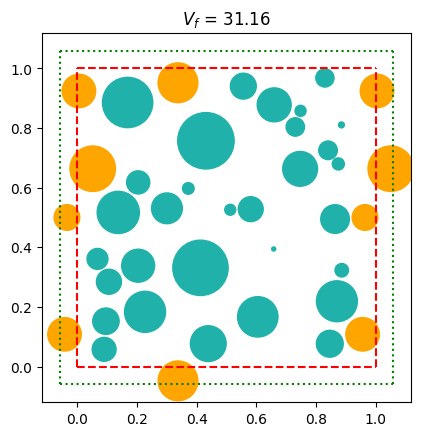

In [14]:
# third-party packages
import sys

# from collections import OrderedDict

# path of local project
folder_path = "/home/yaga/Documents/GitHub/rvesimulator"
sys.path.insert(0, folder_path)

# local functions 
from rvesimulator.microstructures.heter_radius_circles import HeterCircleInclusion 

# initilize the class for 2D micro-structure generation 
microstructure_generator = HeterCircleInclusion(
    length=1.0,
    width=1.0,
    radius_mu=0.06,
    radius_std=0.02,
    vol_req=0.30,
    seed=2,
    # num_guess_max=50000, 
    # num_fiber_max=750, 
    # num_cycle_max= 15, 
    # dist_min_factor=1.1,
) 
# output the features for the rve 
microstructure_generator.generate_rve() 
# visualize the geometry of the 2D rve generated by the algorithm 
microstructure_generator.plot_rve() 
microstructure_generator.save_results(file_name='test.json')

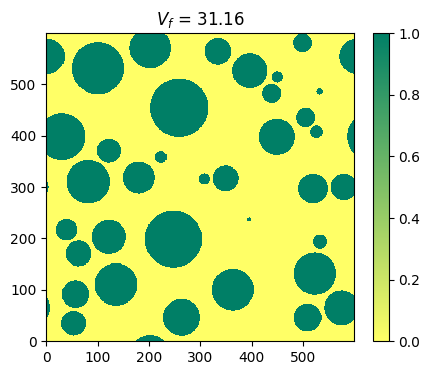

In [16]:
# show it by the crate format 
microstructure_generator.crate_rgmsh(num_discrete=600)
microstructure_generator.rgmsh_plot()
# it should has the following function to save the rgmsh file 
# microstructure_generator.rgmsh_save()

Time of generate the 2D RVE with volume fraction            = 0.10  is 0.01 s


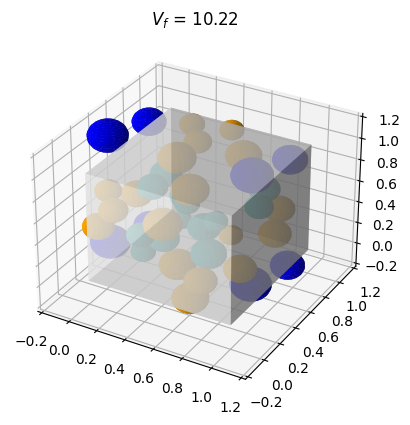

In [17]:
# import the class for 3d micro-structure generation 
from rvesimulator.microstructures.heter_radius_sphere import HeterRadiusSphere
# define the class for 3D microstructure generation
rve3d_generator = HeterRadiusSphere(
    length=1.0,
    width=1.0,
    height=1.0,
    radius_mu=0.1,
    radius_std=0.015,
    vol_req=0.10,
)
rve3d_generator.generate_rve()
rve3d_generator.plot_rve()

### 2.2 design of expriments 


### 2.2.1 typical samplers 
This part mainly used to generate samples as we wish. 
> it has: 
- LatinHyperCube
- SobolSequence
- RandomSampler
- FixNumberSampler


In [19]:
# how to use those samplers 
from collections import OrderedDict
from rvesimulator.design_of_experiment.samplers import (LatinHyperCube, SobolSequence, RandomSampler, FixNumberSampler)
# define the design space 
design_space = OrderedDict({"x1": [1,10], "x2": [0,1]}) 
# initialize the sampler 
sampler = RandomSampler()
sampler.sampling(num_samples=10,design_space=design_space, out_names=['y1','y2'],seed=None)  
sampler.data 

{'samples':          x1        x2
 0  1.209573  0.267880
 1  1.681397  0.953724
 2  2.181900  0.437977
 3  6.001603  0.721447
 4  5.167355  0.847749
 5  3.761515  0.731400
 6  4.318502  0.611379
 7  2.364549  0.250134
 8  7.998844  0.331426
 9  6.929929  0.820720,
 'responses':     y1   y2
 0  NaN  NaN
 1  NaN  NaN
 2  NaN  NaN
 3  NaN  NaN
 4  NaN  NaN
 5  NaN  NaN
 6  NaN  NaN
 7  NaN  NaN
 8  NaN  NaN
 9  NaN  NaN}

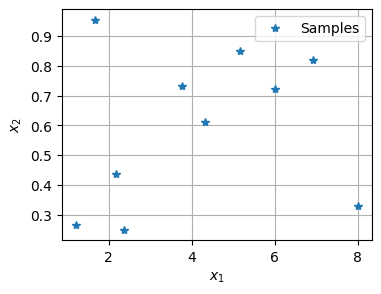

In [20]:
sampler.plot_samples(figsize=(4,3))
sampler.save_doe(name='doe')

In [21]:
# fix number sampling 
design_space = OrderedDict({"x1": 1, "x2": 2}) 
# initialize the sampler 
sampler = FixNumberSampler()
sampler.sampling(num_samples=10,design_space=design_space, out_names=['y1','y2'],seed=None)  
sampler.samples 

,x1,x2
0,1.0,2.0
1,1.0,2.0
2,1.0,2.0
3,1.0,2.0
4,1.0,2.0
5,1.0,2.0
6,1.0,2.0
7,1.0,2.0
8,1.0,2.0
9,1.0,2.0


### 2.2.2 path samplers 
path sampler is used generate the shape of strain path when we want to simulate a rve whose has some prescribed loads.
- 2d case (3 strain compoenents)
- 3d case (6 strain compoenents)

In [22]:
# import the corresponding functions
from rvesimulator.design_of_experiment.path_sampler import StrainPathSampler
from rvesimulator.design_of_experiment.samplers import FixNumberSampler

# design variable is set to be the number of control points for loads path
doe_variables = OrderedDict({"num_control": 8, "num_increment": 200})
num_path = 1
name_outputs = ["stress", "strain", "plastic_energy"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_path,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=None,
)
data = doe_sampler.data
print(data)

{'samples':    num_control  num_increment
0          8.0          200.0, 'responses':   stress strain plastic_energy
0    NaN    NaN            NaN}


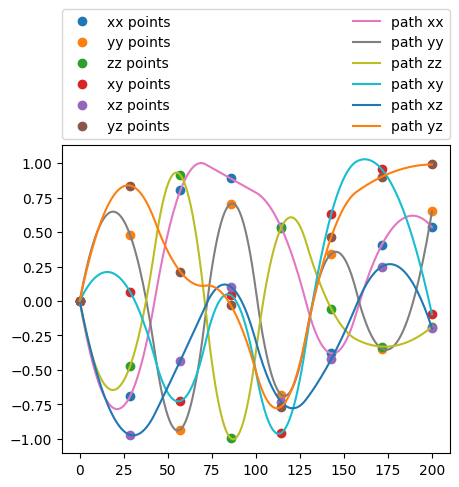

In [30]:
# intialze strain path sampler 
strain_path_generator = AmplitudeCurveSampler(seed=12, num_dim=6) #  2d:num_dim =3 3d: num_dim=6 
data_2d = strain_path_generator.get_strain_path(
    data=data.copy(), arg_name="loads_path", interploation_method="quadratic" # quadratic 
)
strain_path_generator.plot_path(iteration=0) 

In [25]:
print(data_2d["samples"])

   num_control  num_increment  \
0          8.0          200.0   

                                          loads_path  
0  [[0.0, -0.05132281463961828, -0.10067879513163...  


## 3. How to use this repo to generate desired data  


### 3.1  Case study: Hollow plate RVE 
**Problem definition**\
In this part, we are trying to show how the developed RVE simulator works by a simple RVE case called hollow plate RVE. 

> The shematic of the RVE is given by 

<center><img src="illustration.png" width="300"></center>

<center> Fig.schematics of the hollow plate RVE  </center>

<br />

> **Geometry parameters to describe the RVE**
1. length: $L$, width: $W$. Usually, $L=W$; therefore, we only use one parameter (size) to define the shape of RVE 
2. radius: $R$, which is the radius of the plate inside the square 

> **Other parameters for simulation** 
1. Material parameters: 
- Young;s modulus, the default value is $100 \mathrm{Mpa}$
- Poission ratio , the default value is $0.3$ 

2. Loading: 
- $ [ E_{xx}, E_{yy}, E_{xy} ]$ 

3. Mesh:
- mesh portion: divisions of every edges when meshing 

In [32]:
# import functions 
from rvesimulator.design_of_experiment.samplers import RandomSampler
from rvesimulator.simulators.hollow_plate_rve import HollowPlateRVE
# define the design space 
design_space = OrderedDict({"youngs_modulus": [100, 1000]})
# define number of samples
num_points = 3
# define the information of outputs
name_outputs = ["stress", "strain"]
sampler = RandomSampler()
sampler.sampling(
    num_samples=num_points,
    design_space=design_space,
    out_names=name_outputs,
    seed=123456,
)
# print(sampler.data['samples']) 
# print(sampler.data['responses'])

     radius      size
0  0.138091  1.483359
1  0.178143  1.448618
2  0.213025  1.168111
  stress strain
0    NaN    NaN
1    NaN    NaN
2    NaN    NaN


In [34]:
# initialize the abaqus simulator
simulation_wrapper = HollowPlateRVE()
# print the default simulaton information of the RVE 
simulation_wrapper.update_sim_info(youngs_modulus=1000, print_info=True)

The simulation information is : {'job_name': 'HollowPlateRVE', 'radius': 0.2, 'size': 1.0, 'youngs_modulus': 1000, 'poission_ratio': 0.3, 'mesh_portion': 30, 'loads': [0.1, 0.0, 0.0], 'num_cpu': 1, 'platform': 'ubuntu'}


In [12]:
# run the simulation 
data = simulation_wrapper.run_simulation(data=sampler.data.copy(), save_source_files=False)

Current working directory: /home/yaga/Documents/GitHub/rvesimulator/examples/longtalk/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 40.05593967437744
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


Current working directory: /home/yaga/Documents/GitHub/rvesimulator/examples/longtalk/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


Abaqus Error: cae exited with an error.
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 40.05329895019531
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


Current working directory: /home/yaga/Documents/GitHub/rvesimulator/examples/longtalk/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 40.05943274497986
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


Text(0.5, 0.98, 'simulation results')

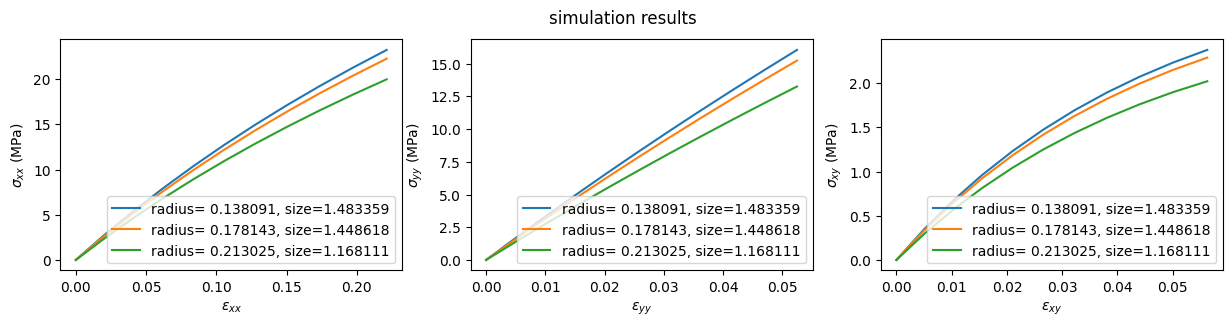

In [13]:
samples = data["samples"]
respones = data["responses"]
# define parameter of plot figures
import matplotlib.pyplot as plt
%matplotlib inline

# with plt.style.context(["science", "ieee"]):
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")
ax[0].plot(
    respones["strain"][0][:, 0, 0],
    respones["stress"][0][:, 0, 0],
    label=f'radius= {samples["radius"][0]:2f}, size={samples["size"][0]:2f}',
)
ax[0].plot(
    respones["strain"][1][:, 0, 0],
    respones["stress"][1][:, 0, 0],
    label=f'radius= {samples["radius"][1]:2f}, size={samples["size"][1]:2f}',
)
ax[0].plot(
    respones["strain"][2][:, 0, 0],
    respones["stress"][2][:, 0, 0],
    label=f'radius= {samples["radius"][2]:2f}, size={samples["size"][2]:2f}',
)
ax[0].legend()
ax[0].set(**pparam)

pparam = dict(xlabel="$\epsilon_{yy}$", ylabel="$\sigma_{yy}$ (MPa)")
ax[1].plot(
    respones["strain"][0][:, 1, 1],
    respones["stress"][0][:, 1, 1],
    label=f'radius= {samples["radius"][0]:2f}, size={samples["size"][0]:2f}',
)
ax[1].plot(
    respones["strain"][1][:, 1, 1],
    respones["stress"][1][:, 1, 1],
    label=f'radius= {samples["radius"][1]:2f}, size={samples["size"][1]:2f}',
)
ax[1].plot(
    respones["strain"][2][:, 1, 1],
    respones["stress"][2][:, 1, 1],
    label=f'radius= {samples["radius"][2]:2f}, size={samples["size"][2]:2f}',
)
ax[1].legend()
ax[1].set(**pparam)

pparam = dict(xlabel="$\epsilon_{xy}$", ylabel="$\sigma_{xy}$ (MPa)")
ax[2].plot(
    respones["strain"][0][:, 1, 0],
    respones["stress"][0][:, 1, 0],
    label=f'radius= {samples["radius"][0]:2f}, size={samples["size"][0]:2f}',
)
ax[2].plot(
    respones["strain"][1][:, 1, 0],
    respones["stress"][1][:, 1, 0],
    label=f'radius= {samples["radius"][1]:2f}, size={samples["size"][1]:2f}',
)
ax[2].plot(
    respones["strain"][2][:, 1, 0],
    respones["stress"][2][:, 1, 0],
    label=f'radius= {samples["radius"][2]:2f}, size={samples["size"][2]:2f}',
)
ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('simulation results')

### 3.2  Case study: CDDM cases
**Problem definition**\
In this part, we choose two design variables which are the micro-structure and the yield criterion and each of them do have two levels. 
- **Design variables** \
(1) micro-structure \
&nbsp; (A)$v_{frac} = 0.45$,  $L=0.048$ , $R_{mu}=0.01$, $R_{std}=0.003$ \
&nbsp; (B)$v_{frac} = 0.30$,  $L=0.048$ , $R_{mu}=0.003$, $R_{std}=0.0$ \
&nbsp; (C)$v_{frac} = 0.15$,  $L=0.048$ , $R_{mu}=0.0015$, $R_{std}=0.00005$ \
(2) hardening law \
&nbsp; linear:  (a) $\sigma_{y} = 0.5+0.5\bar\epsilon$ \
&nbsp;  swift:(b) $\sigma_{y} = 0.5+0.5(\bar\epsilon)^{0.4}$   
&nbsp;  ramberg: (c) $\sigma_{y} = 0.5(1+ \bar\epsilon)^{1/0.4}$   
&nbsp; swift: (d) $\sigma_{y} = 3+0.5(\bar\epsilon)^{0.4}$   
(3) young's modulus for fibers  \
&nbsp;  (I) $E_{fiber}=1$ MPa \
&nbsp;  (II) $E_{fiber} =10$ MPa \
&nbsp;  (III) $E_{fiber} =1000$ MPa   
 
 - **how to set up the tasks** \
 In order to set up the tasks properly, we select a value from each variable ramdomly and assemble them together as the final tasks. For instance, we may get samples with A, a, and I, in this case, the first task would be "AaI".

 Therefore, we can set up the tasks as: 
 > Task 1: AaII \
 > Task 2: BbI \
 > Task 3: CcIII \
 > Taks 4: BdIV 

#### 3.2.1 Visualize the design variable information 

In [14]:
# import local packages and functions 
import rvesimulator 
from rvesimulator.simulators.coopative_learning_case import CooperativeRVE
from rvesimulator.design_of_experiment.samplers import FixNumberSampler
from rvesimulator.design_of_experiment.path_sampler import StrainPathSampler
from rvesimulator.microstructures.heter_radius_circles import HeterCircleInclusion

##### 3.2.1.1 different geometries 

Time of generate the 2D RVE with volume fraction            = 0.46  is 0.07 s


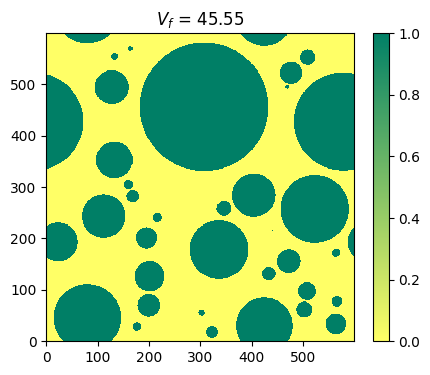

In [15]:
# visualize the micro-structure for micro-strcuture 1 
microstructure_generator = HeterCircleInclusion(
    length=0.048,
    width=0.048,
    radius_mu=0.01,
    radius_std=0.005,
    vol_req=0.45,
    seed=23, 
) 
microstructure_generator.generate_rve()
microstructure_generator.crate_rgmsh(num_discrete=600)
microstructure_generator.rgmsh_plot()

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.01 s


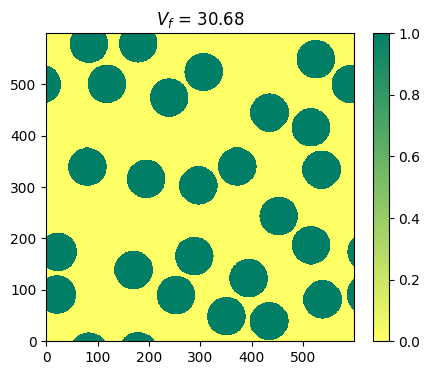

In [16]:
# visualize the micro-structure for micro-strcuture 1 
microstructure_generator = HeterCircleInclusion(
    length=0.048,
    width=0.048,
    radius_mu=0.003,
    radius_std=0.0,
    vol_req=0.30,
    seed=17, 
) 
microstructure_generator.generate_rve()
microstructure_generator.crate_rgmsh(num_discrete=600)
microstructure_generator.rgmsh_plot()

Time of generate the 2D RVE with volume fraction            = 0.15  is 0.01 s


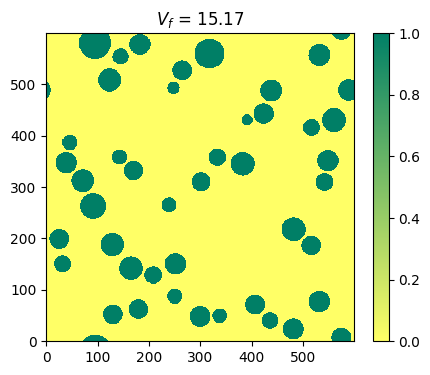

In [17]:
# visualize the micro-structure for micro-strcuture 1 
microstructure_generator = HeterCircleInclusion(
    length=0.048,
    width=0.048,
    radius_mu=0.0015,
    radius_std=0.0003,
    vol_req=0.15,
    seed=17,  
) 
microstructure_generator.generate_rve()
microstructure_generator.crate_rgmsh(num_discrete=600)
microstructure_generator.rgmsh_plot()

##### 3.2.1.2 different yield laws  

[]

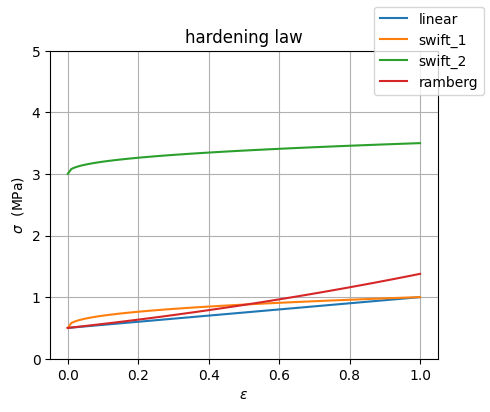

In [18]:
# plot the yield criterion 
import numpy as np
x_plot = np.linspace(0,1,100) 
y_plot_linear =0.5 + 0.5 * x_plot 
y_plot_swift_1 = 0.5 + 0.5*(x_plot)**0.4
y_plot_swift_2 = 3.0 + 0.5*(x_plot)**0.4
y_plot_ramberg = 0.5*(1+0.5*x_plot)**(1/0.4)

fig, ax = plt.subplots(figsize=(5,4)) 
ax.plot(x_plot, y_plot_linear, label='linear')
ax.plot(x_plot, y_plot_swift_1, label='swift_1') 
ax.plot(x_plot, y_plot_swift_2, label='swift_2') 
ax.plot(x_plot, y_plot_ramberg, label='ramberg') 

fig.legend() 
plt.grid()
plt.ylim([0,5])
plt.title('hardening law') 
plt.xlabel(r'$\epsilon$') 
plt.ylabel(r'$\sigma$  (MPa)')
plt.plot()

#### 3.2.2 set up the simulation  

In [35]:
# create the doe
# define the design space
doe_variables = OrderedDict({"num_control": 7, "num_increment": 100})

# define number of samples
num_points = 10
# define the information of outputs
name_outputs = ["strain", "stress", "plastic_energy"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=1,
)
data = doe_sampler.data
print(data)

{'samples':    num_control  num_increment
0          7.0          100.0
1          7.0          100.0
2          7.0          100.0
3          7.0          100.0
4          7.0          100.0
5          7.0          100.0
6          7.0          100.0
7          7.0          100.0
8          7.0          100.0
9          7.0          100.0, 'responses':   strain stress plastic_energy
0    NaN    NaN            NaN
1    NaN    NaN            NaN
2    NaN    NaN            NaN
3    NaN    NaN            NaN
4    NaN    NaN            NaN
5    NaN    NaN            NaN
6    NaN    NaN            NaN
7    NaN    NaN            NaN
8    NaN    NaN            NaN
9    NaN    NaN            NaN}


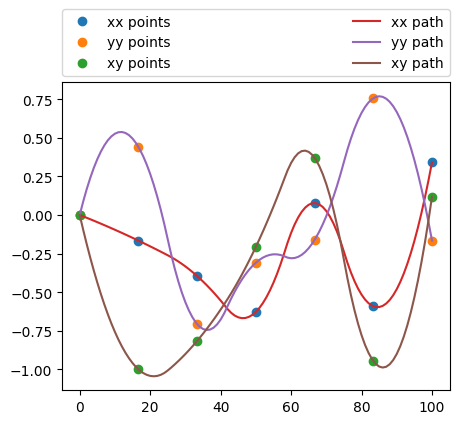

In [20]:
# initialize the strain path generator
strain_path_generator = StrainPathSampler(seed=1, num_dim=3)
data_2d = strain_path_generator.get_strain_path(
    data=data.copy(), arg_name="loads_path", interploation_method="quadratic"
)
strain_path_generator.plot_path(iteration=0) 

In [21]:
print(data_2d)

{'samples':    num_control  num_increment  \
0          7.0          100.0   

                                          loads_path  
0  [[0.0, -0.00905510646853196, -0.01822539416691...  , 'responses':   strain stress plastic_energy
0    NaN    NaN            NaN}


##### task 1 
- $v_{frac} = 0.45$
- $L=0.048$ 
- $R_{mu}=0.01$
- $R_{std}=0.003$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) hardening law :  linear $\sigma_{y} = 0.5+0.5\bar\epsilon$
- fiber property \
(1) $E=10{MPa}$\
(2) $v=0.19$ 


In [22]:
simulation_wrapper = CooperativeRVE() 
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.45, 
                                    radius_mu=0.01,
                                    radius_std=0.003, 
                                    E_fiber=10,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='linear', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    num_cpu=6,
                                    seed=23,
                                    print_info=True) 

Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.01, 'radius_std': 0.005, 'seed': 23}
vol_req is: 0.45
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.505, 0.51, 0.515, 0.52, 0.525, 0.53, 0.535, 0.54, 0.545, 0.55, 0.555, 0.56, 0.565, 0.5700000000000001, 0.575, 0.58, 0.585, 0.59, 0.595, 0.6, 0.605, 0.61, 0.615, 0.62, 0.625, 0.63, 0.635, 0.64, 0.645, 0.65, 0.655, 0.66, 0.665, 0.67, 0.675, 0.6799999999999999, 0.685, 0.69, 0.6950000000000001, 0.7, 0.7050000000000001, 0.71, 0.715, 0.72, 0.725, 0.73, 0.735, 0.74, 0.745, 0.75, 0.755, 0.76, 0.765, 0.77, 0.775, 0.78, 0.785, 0.79, 0.7949999999999999, 0.8, 0.8049999999999999, 0.81, 0.815, 0.8200000000000001, 0.825, 0.8300000000000001, 0.835, 0.8400000000000001, 0.845, 0.8500000000000001, 0.855, 0.86, 0.865, 0.87, 0.875, 0.88, 0.885, 0.89, 0.89

results.p do not exist

micro_structure_info.json do not exist

Time of generate the 2D RVE with volume fraction            = 0.46  is 0.07 s


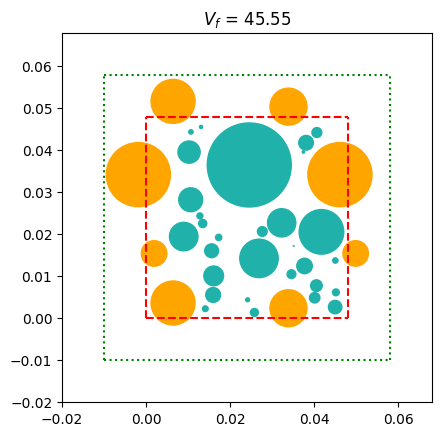

micro-structure be generated successfully

Current working directory: /home/yaga/Documents/GitHub/rvesimulator/examples/longtalk/Data/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


simulation time :40.009584 s
simulation time :60.020289 s
simulation time :80.019306 s
simulation time :100.018959 s
simulation time :120.018953 s
simulation time :140.020347 s
simulation time :160.019506 s
simulation time :180.019011 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 200.1011004447937
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


In [23]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_1.pickle') 

##### Task 2

- $v_{frac} = 0.15$
- $L=0.048$ 
- $R_{mu}=0.003$
- $R_{std}=0.0$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) hardening law: swift $\sigma_{y} = 0.5+0.5(\bar\epsilon)^{0.4}$
- fiber property\
(1) $E=1{MPa}$\
(2) $v=0.19$ 


In [24]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.30, 
                                    radius_mu=0.003,
                                    radius_std=0.0, 
                                    E_fiber=1,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='swift', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    b=0.4,
                                    num_cpu=6,
                                    seed=17,
                                    print_info=True) 

Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.003, 'radius_std': 0.0, 'seed': 17}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5792446596230557, 0.6045639552591273, 0.6229754742924681, 0.6379729661461215, 0.6508544084136291, 0.6622671111599604, 0.6725874532990042, 0.682056420302608, 0.6908389454809087, 0.6990535852767487, 0.7067888311395025, 0.7141127368338324, 0.7210789255640928, 0.7277305099281833, 0.7341027460023103, 0.7402248867962862, 0.7461215111265916, 0.7518134982456163, 0.7573187569288689, 0.7626527804403767, 0.7678290755153834, 0.7728594985480539, 0.7777545223286737, 0.7825234500494767, 0.7871745887492587, 0.7917153911869923, 0.796152572875223, 0.8004922093745831, 0.8047398177595422, 0.808900425283706, 0.8129786276126214, 0.8169786384922226, 0.8209043

remove results.p successfully

remove micro_structure_info.json successfully

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.01 s


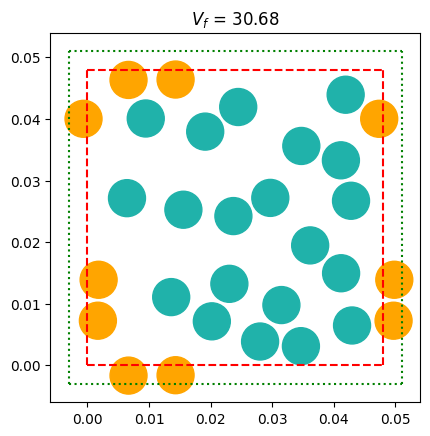

micro-structure be generated successfully

Current working directory: /home/yaga/Documents/GitHub/rvesimulator/examples/longtalk/Data/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


simulation time :40.009042 s
simulation time :60.016997 s
simulation time :80.017440 s
simulation time :100.019787 s
simulation time :120.017044 s
simulation time :140.017133 s
simulation time :160.018054 s
simulation time :180.021529 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 200.06663179397583
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


In [25]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_2.pickle')

##### Task 3

- $v_{frac} = 0.15$
- $L=0.048$ 
- $R_{mu}=0.0015$
- $R_{std}=0.0005$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) hardening law:ramberg  $\sigma_{y} = 0.5(1+0.5\bar\epsilon)^{1/0.4}$
- fiber property \  
(1) $E=1000{MPa}$\
(2) $v=0.19$ 

In [26]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.15, 
                                    radius_mu=0.0015,
                                    radius_std=0.0003, 
                                    E_fiber=1000,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='ramberg', 
                                    yield_stress = 0.5,
                                    a=0.5,
                                    b=0.4,
                                    num_cpu=6,
                                    seed=17,
                                    print_info=True) 

Micro-structure file will be updated 

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius_mu': 0.0015, 'radius_std': 0.0003, 'seed': 17}
vol_req is: 0.15
Info of Abaqus simulation : {'mesh_partition': 100, 'loads': [0.02, 0.02, 0.02], 'time_period': 1.0, 'loads_path': None, 'E_matrix': 100, 'Pr_matrix': 0.3, 'yield_table_matrix': [[0.5, 0.5062734570190611, 0.512593906055271, 0.5189614638594022, 0.5253762468935953, 0.5318383713334871, 0.5383479530703168, 0.5449051077130023, 0.5515099505901957, 0.5581625967523094, 0.564863160973523, 0.5716117577537604, 0.5784085013206498, 0.5852535056314538, 0.5921468843749835, 0.5990887509734836, 0.6060792185845016, 0.6131184001027299, 0.6202064081618314, 0.6273433551362393, 0.6345293531429418, 0.6417645140432402, 0.6490489494444931, 0.6563827707018358, 0.6637660889198846, 0.6711990149544181, 0.6786816594140436, 0.6862141326618417, 0.6937965448169948, 0.7014290057563961, 0.7091116251162435, 0.7168445122936137, 0.7246277764480188, 0.7

remove results.p successfully

remove micro_structure_info.json successfully

Time of generate the 2D RVE with volume fraction            = 0.15  is 0.01 s


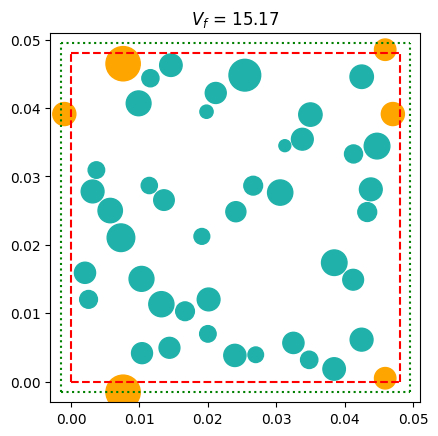

micro-structure be generated successfully

Current working directory: /home/yaga/Documents/GitHub/rvesimulator/examples/longtalk/Data/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


simulation time :40.006988 s
simulation time :60.018980 s
simulation time :80.019054 s
simulation time :100.020405 s
simulation time :120.007369 s
simulation time :140.020691 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 160.0595018863678
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


In [27]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_3.pickle')

##### Task 4 
- $v_{frac} = 0.30$
- $L=0.048$ 
- $R_{mu}=0.003$
- $R_{std}=0.0$ 
- material property of matrix \
(1) $E=100{MPa}$\
(2) $v=0.3$ \
(3) hardening law :  linear $\sigma_{y} = 1.5+0.5\bar\epsilon$
- fiber property \
(1) $E=1{MPa}$\
(2) $v=0.19$ 

In [28]:
simulation_wrapper.update_sim_info( mesh_partition=100, 
                                    vol_req=0.30, 
                                    radius_mu=0.003,
                                    radius_std=0.0, 
                                    E_fiber=1,
                                    E_matrix=100,
                                    update_micro_structure=True,
                                    hardening_law='swift', 
                                    yield_stress = 3,
                                    a=0.5,
                                    b=0.4,
                                    num_cpu=6,
                                    seed=17,
                                    print_info=False) 

Micro-structure file will be updated 



remove results.p successfully

remove micro_structure_info.json successfully

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.01 s


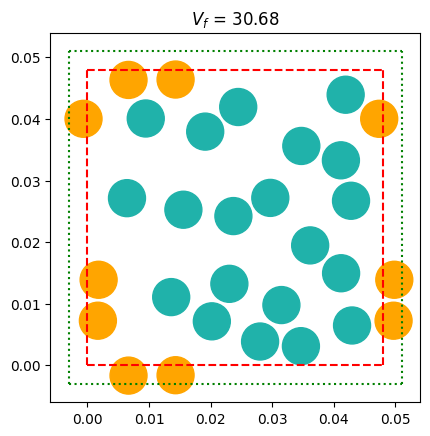

micro-structure be generated successfully

Current working directory: /home/yaga/Documents/GitHub/rvesimulator/examples/longtalk/Data/Data/data
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<18 out of 30 licenses remain available>.


simulation time :40.008404 s
simulation time :60.016801 s
simulation time :80.020307 s
simulation time :100.017500 s
simulation time :120.016443 s
Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 140.05586695671082
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<17 out of 30 licenses remain available>.


In [29]:
results = simulation_wrapper.run_simulation(data=data_2d.copy(),save_source_files=False)
simulation_wrapper.save_data('task_4.pickle')

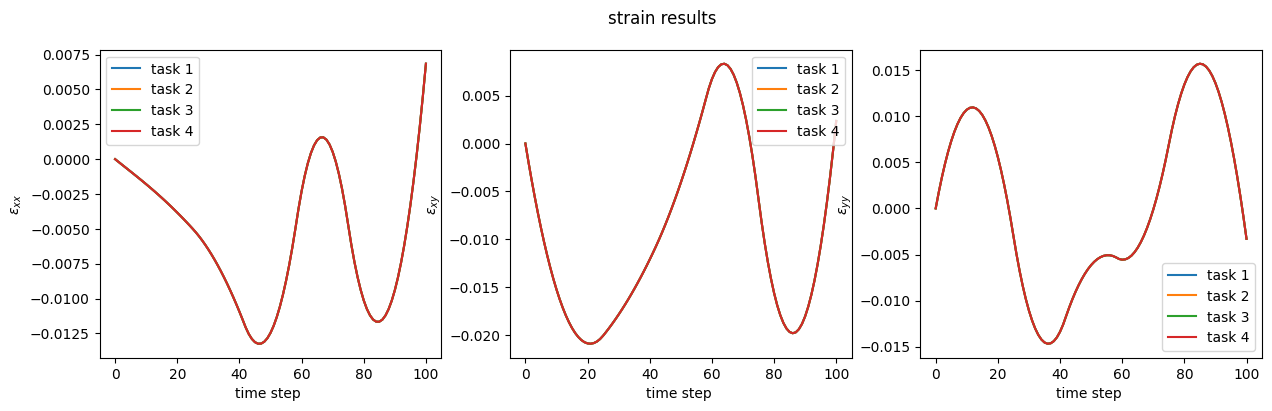

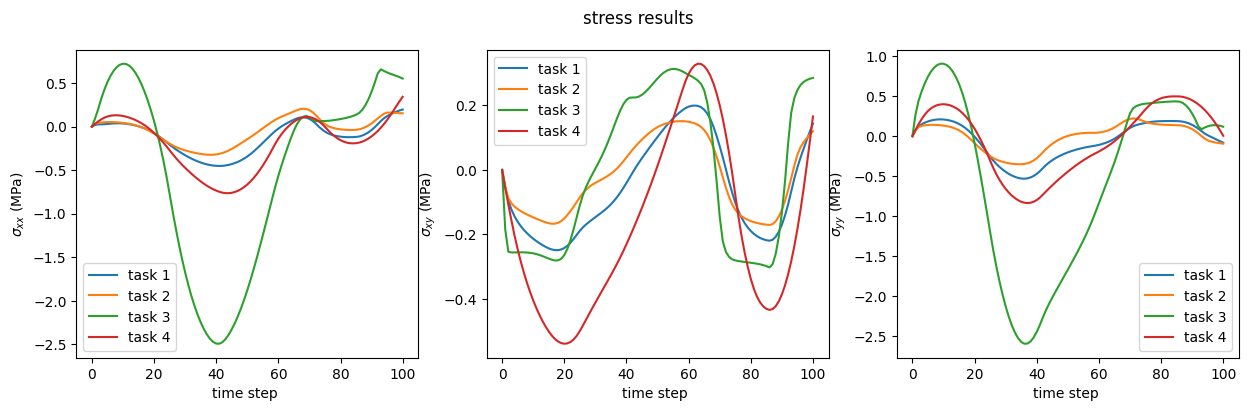

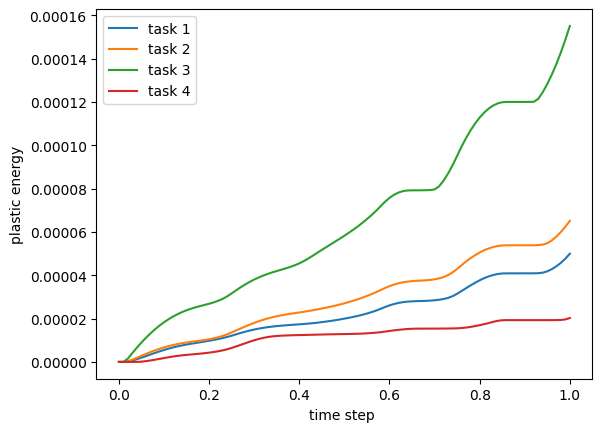

In [30]:
# os.chdir('..')
import pickle
with open("task_1.pickle", "rb") as fd:
    benchmark_1 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_2.pickle", "rb") as fd:
    benchmark_2 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_3.pickle", "rb") as fd:
    benchmark_3 = pickle.load(fd, fix_imports=True, encoding="latin1")
with open("task_4.pickle", "rb") as fd:
    benchmark_4 = pickle.load(fd, fix_imports=True, encoding="latin1")
results_1 =benchmark_1["responses"]
results_2 =benchmark_2["responses"]
results_3 =benchmark_3["responses"]
results_4 =benchmark_4["responses"]

# result of benchmark1
stress_1 = results_1["stress"].iloc[0]
strain_1 = results_1["strain"].iloc[0]
plastic_energy_1 = results_1["plastic_energy"].iloc[0]
# result of benchmark2
stress_2 = results_2["stress"].iloc[0]
strain_2 = results_2["strain"].iloc[0]
plastic_energy_2 = results_2["plastic_energy"].iloc[0]

# result of benchmark3
stress_3 = results_3["stress"].iloc[0]
strain_3 = results_3["strain"].iloc[0]
plastic_energy_3 = results_3["plastic_energy"].iloc[0]

# result of benchmark4
stress_4 = results_4["stress"].iloc[0]
strain_4 = results_4["strain"].iloc[0]
plastic_energy_4 = results_4["plastic_energy"].iloc[0]


pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xx}$")
fig, ax = plt.subplots(1,3, figsize=(15,4))
ax[0].plot(strain_1[:, 0, 0], label="task 1") 
ax[0].plot(strain_2[:, 0, 0], label="task 2") 
ax[0].plot(strain_3[:, 0, 0], label="task 3") 
ax[0].plot(strain_4[:, 0, 0], label="task 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{xy}$")
ax[1].plot(strain_1[:, 0, 1], label="task 1")
ax[1].plot(strain_2[:, 0, 1], label="task 2")
ax[1].plot(strain_3[:, 0, 1], label="task 3")
ax[1].plot(strain_4[:, 0, 1], label="task 4")
ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\epsilon_{yy}$")
ax[2].plot(strain_1[:, 1, 1], label="task 1") 
ax[2].plot(strain_2[:, 1, 1], label="task 2") 
ax[2].plot(strain_3[:, 1, 1], label="task 3") 
ax[2].plot(strain_4[:, 1, 1], label="task 4") 

ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('strain results')
plt.savefig('strain.png', dpi=300)

pparam = dict(xlabel='time step ', ylabel="$\sigma_{xx}$ (MPa)")
fig, ax = plt.subplots(1,3,figsize=(15,4))
ax[0].plot(stress_1[:, 0, 0], label="task 1") 
ax[0].plot(stress_2[:, 0, 0], label="task 2") 
ax[0].plot(stress_3[:, 0, 0], label="task 3") 
ax[0].plot(stress_4[:, 0, 0], label="task 4") 
ax[0].legend()
ax[0].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{xy}$ (MPa)")
ax[1].plot(stress_1[:, 1, 0], label="task 1")
ax[1].plot(stress_2[:, 1, 0], label="task 2")
ax[1].plot(stress_3[:, 1, 0], label="task 3")
ax[1].plot(stress_4[:, 1, 0], label="task 4")

ax[1].legend()
ax[1].set(**pparam)
pparam = dict(xlabel='time step ', ylabel="$\sigma_{yy}$ (MPa)")
ax[2].plot(stress_1[:, 1, 1], label="task 1") 
ax[2].plot(stress_2[:, 1, 1], label="task 2") 
ax[2].plot(stress_3[:, 1, 1], label="task 3") 
ax[2].plot(stress_4[:, 1, 1], label="task 4") 

ax[2].legend()
ax[2].set(**pparam)
fig.suptitle('stress results')
# plt.show()
plt.savefig('stress.png', dpi=300)


pparam = dict(xlabel='time step ', ylabel="plastic energy")
fig, ax = plt.subplots()
ax.plot(plastic_energy_1[:,0], plastic_energy_1[:,1], label="task 1") 
ax.plot(plastic_energy_2[:,0], plastic_energy_2[:,1], label="task 2") 
ax.plot(plastic_energy_3[:,0], plastic_energy_3[:,1], label="task 3") 
ax.plot(plastic_energy_4[:,0], plastic_energy_4[:,1], label="task 4") 
ax.legend()
ax.set(**pparam)
plt.savefig('energy.png', dpi=300)

## 4. Further Development 
- 1. 3D rve simulation in abaqus 
- 2. Add two more use-subroutines 
- 3. Add cohesive zone modeling 
- 4. figure out how to parallize abaqus simulation